#### Question 1. Equated Monthly Installment.

In [ ]:
def compute_emi(rate :float,N :int,PV :int,FV :int):
    EMI = (PV+FV/pow(1+rate,N))*(rate*pow(1+rate,N)/(pow(1+rate,N)-1)) 
    return EMI 

Write a Python program asks the user to enter PV and FV and returns the computed EMI for rate=0.04, N=20. The program displays the computed EMI to the user.

In [ ]:
rate = 0.04
N = 20

while (1):
    try: #Use inbuilt input() function to get an integer
        PV = int(input("Please enter PV: "))
        FV = int(input("Please enter FV: "))
    except: 
        print("Not an integer! Try again")
    else: #EMI is calculated if entered PV and FV are integers
        break
EMI = compute_emi(rate,N,PV,FV)
print("EMI equals", EMI)

#### Question 2. 

Write a Python code which takes a text file as an input and writes into an output file the list of unique words, sorted based on their character length in a descending order. You should convert all letters to lowercase before you proceed with creating the list of unique words. You may assume that the file contains only words separated by a single space.

In [130]:
myfile = open('question2.txt')
x = myfile.readlines()
myfile.close()
y=''.join(x)
y=y.lower()
y=y.replace("\n", " ")
unique = list(set(y.split(' ')))
unique_sorted=sorted(unique, key = len,reverse=True)
unique_sorted='\n'.join(unique_sorted)
print(unique_sorted)

established
university
selective
manhattan
business
columbia
schools
league
school
oldest
among
world
york
1916
city
most
one
the
top
and
ivy
six
new
it
is
in
of


In [131]:
print(unique_sorted,  file=open('question2_answer.txt', 'w'))

#### Question 3.

Create one dot plot, one bar plot, one boxplot, one pie chart, using at least two variables.

In [132]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
#%matplotlib notebook
%matplotlib inline
plot.style.use('seaborn')

We import the data on student performance in math in two Portugese schools. The data includes student grades, demographic, social and school related features. The data comes from UCI ML repository: http://archive.ics.uci.edu/ml/datasets/Student+Performance#

In [139]:
student = pd.read_csv('student-mat.csv', sep=";")
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

Dot plot: we can see that some females skipped the school more than males.

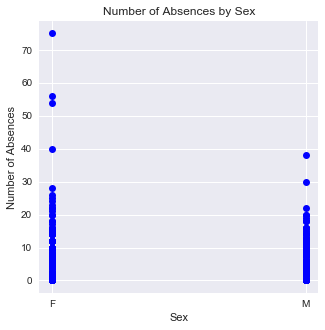

In [145]:
x = student['sex'].values
y = student['absences'].values
plot.rcParams['figure.figsize'] = (5,5)
plot.plot(x,y,'bo')
plot.xlabel('Sex')
plot.ylabel('Number of Absences')
plot.title('Number of Absences by Sex')
plot.show()

Bar plot: math achievement by health status. We can see that poor health is unlikely to affect student performance.

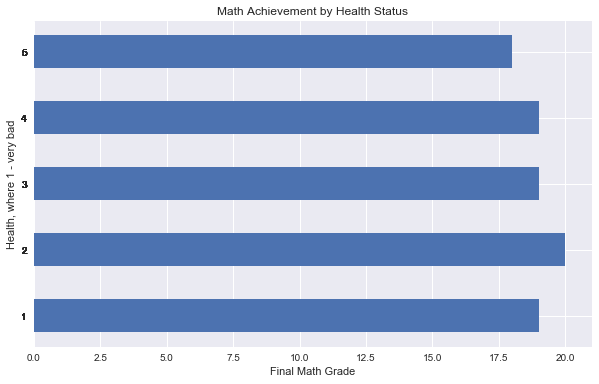

In [151]:
x = student['health'].values
y = student['G3'].values # math final grade
plot.rcParams['figure.figsize'] = (10,6)
plot.barh(x,y,0.5)
plot.yticks(x)
plot.xlabel('Final Math Grade')
plot.ylabel('Health, where 1 - very bad')
plot.title('Math Achievement by Health Status')
plot.show()

Boxplot: summarizes the distribution of student performance in math by sex. On average, performance of females is lower that performance of males.

[Text(0, 0.5, 'Achievement'), Text(0.5, 0, 'Sex')]

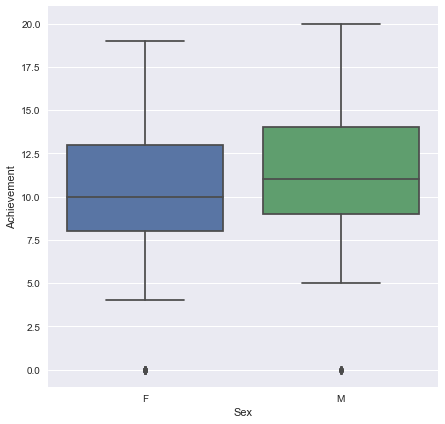

In [177]:
import seaborn as sns
sns.boxplot(y='G3', x='sex',data=student).set(
    xlabel='Sex', 
    ylabel='Achievement')

Pie chart: show the share of male students who were in a romantic relationship at the time of data collection.

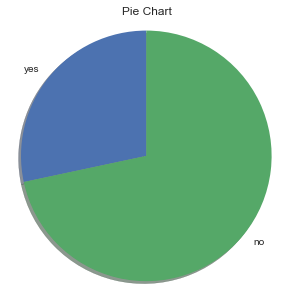

In [221]:
y=student[student.sex == 'M'] # select a subset of males
romantic_type=y.groupby('romantic').agg('count') # count which students were in a romantic relationship
counts = romantic_type.sex.sort_values() # save data
labels="yes", "no"
plot.rcParams['figure.figsize'] = (5,5)
plot.pie(counts, labels=labels, shadow=True, startangle=90)
plot.axis('equal')
plot.title('Pie Chart')
plot.show()